In [1]:
pip install opencv-python

In [2]:
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
img0="/content/gdrive/MyDrive/Datasets/multiphoto/Apoorv.jpg"

In [51]:
img1="/content/gdrive/MyDrive/Datasets/multiphoto/multiface_phot.webp"

In [29]:
img2="/content/gdrive/MyDrive/Datasets/multiphoto/multiface2.jpg"

In [52]:
r_img=cv2.imread(img1)

In [53]:
r_img

array([[[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [240, 245, 245],
        [240, 245, 245],
        [240, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [240, 245, 245],
        [240, 245, 245],
        [240, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [240, 245, 245],
        [240, 245, 245],
        [240, 245, 245]],

       ...,

       [[175, 120,  13],
        [175, 120,  13],
        [175, 120,  13],
        ...,
        [175, 119,  15],
        [175, 119,  15],
        [175, 119,  15]],

       [[175, 120,  13],
        [175, 120,  13],
        [175, 120,  13],
        ...,
        [175, 119,  15],
        [175, 119,  15],
        [175, 119,  15]],

       [[175, 120,  13],
        [175, 120,  13],
        [175, 120,  13],
        ...,
        [175, 119,  15],
        [175, 119,  15],
        [175, 119,  15]]

In [54]:
r_img[0].shape

(1600, 3)

In [55]:
r_img.shape

(1307, 1600, 3)

In [56]:
gray_img=cv2.cvtColor(r_img,cv2.COLOR_BGR2GRAY)

In [57]:
gray_img.shape

(1307, 1600)

In [58]:
gray_img[0].shape

(1600,)

In [59]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [60]:
#The detectMultiScale() method is used to identify faces of different sizes in the input image
#Scale factor : This parameter is used to scale down the size of the input image to make it easier for the algorithm to detect larger faces. In this case, we have specified a scale factor of 1.1, indicating that we want to reduce the image size by 10%.
face = face_classifier.detectMultiScale(
    gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [61]:
#The parameter 0,255,0 represents the color of the bounding box, which is green, and 4 indicates its thickness.
count=0
for (x, y, w, h) in face:
    count+=1
    cv2.rectangle(r_img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [62]:
img_rgb = cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB)

(-0.5, 1599.5, 1306.5, -0.5)

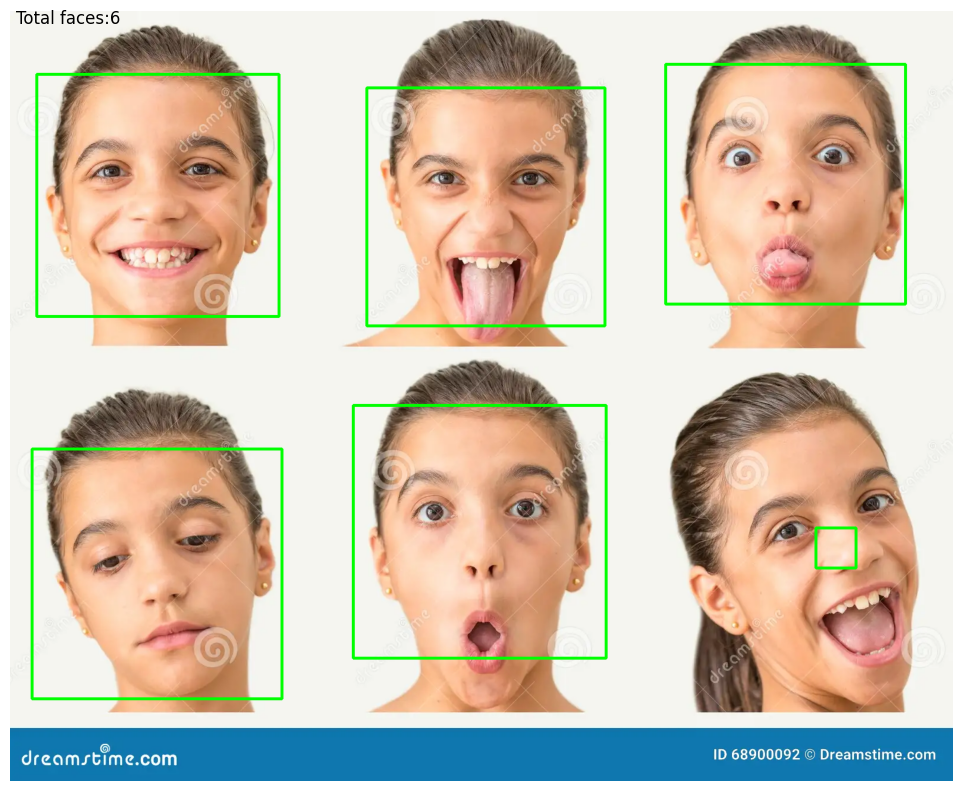

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.text(10, 20, "Total faces:"+str(count), fontsize=12)
plt.imshow(img_rgb)
plt.axis('off')

RealTime Face Detection with face counts

In [65]:
import cv2

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [66]:
video_capture = cv2.VideoCapture(0)

In [67]:
def detect_bounding_box(vid):
    cout=0
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
        cout+=1
        cv2.putText(vid, 'face count'+str(cout), (x-10, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    return faces

In [68]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )
      # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break


In [69]:
video_capture.release()
cv2.destroyAllWindows()